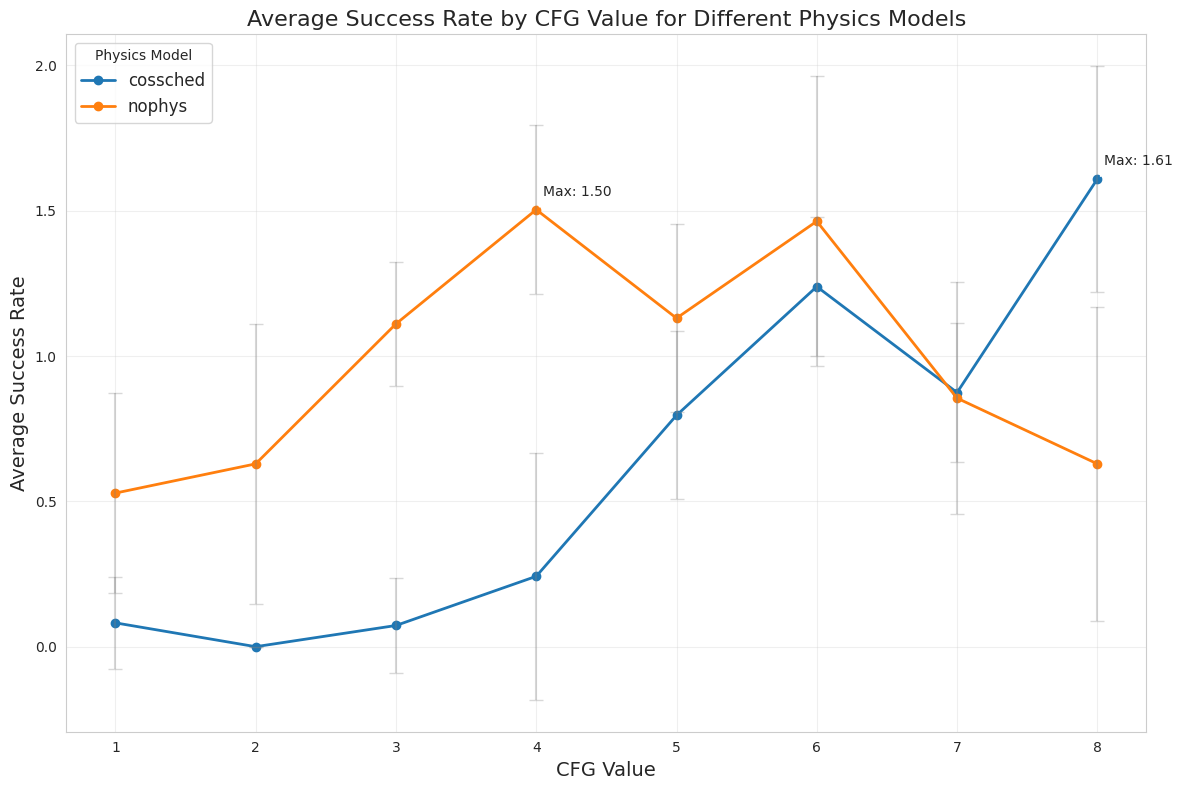

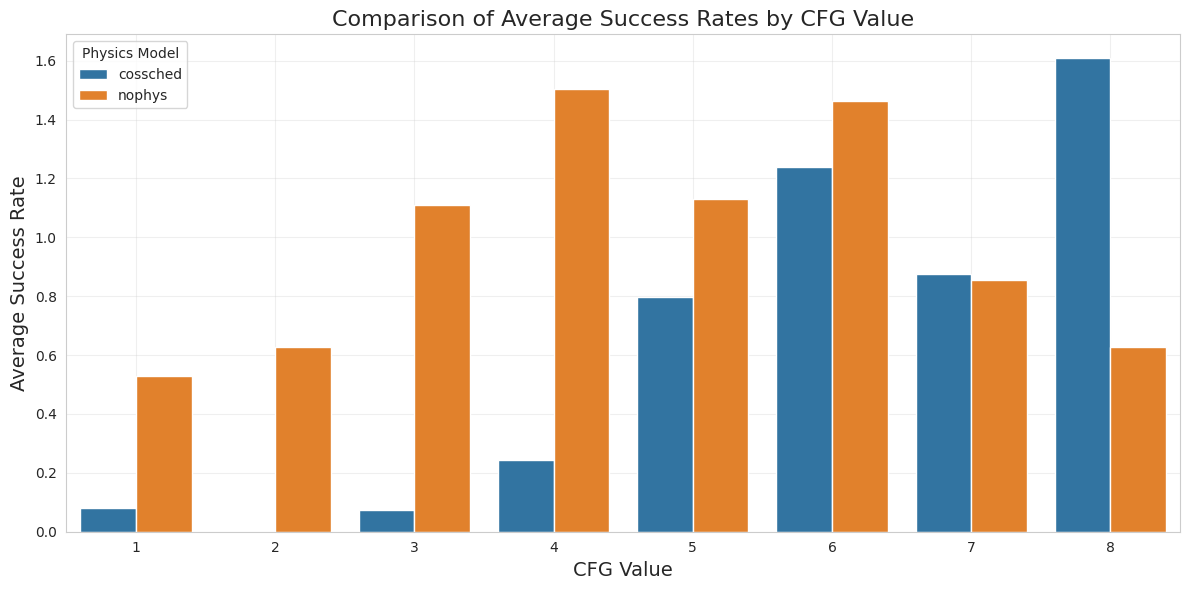

Summary Statistics:
                mean     std     min     max
physics  cfg                                
cossched 1    0.0820  0.1591  0.0000  0.3645
         2    0.0000  0.0000  0.0000  0.0000
         3    0.0729  0.1630  0.0000  0.3645
         4    0.2421  0.4256  0.0000  0.9828
         5    0.7961  0.2895  0.4423  1.1794
         6    1.2388  0.2403  0.9828  1.6349
         7    0.8744  0.2389  0.5897  1.2275
         8    1.6091  0.3887  1.1289  1.9636
nophys   1    0.5285  0.3434  0.0000  0.9567
         2    0.6290  0.4807  0.0000  1.2776
         3    1.1106  0.2131  0.8845  1.3759
         4    1.5037  0.2920  1.0319  1.8182
         5    1.1302  0.3241  0.6388  1.4251
         6    1.4637  0.4982  0.9828  2.1104
         7    0.8550  0.4001  0.3931  1.4251
         8    0.6290  0.5399  0.0000  1.2776


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
df = pd.read_csv('ks_test_results.csv')

# Group by physics and cfg, then calculate the mean success rate
grouped_data = df.groupby(['physics', 'cfg'])['average_success_rate'].mean().reset_index()

# Create a pivot table for easier plotting
pivot_data = grouped_data.pivot(index='cfg', columns='physics', values='average_success_rate')

# Set up the plot
plt.figure(figsize=(12, 8))
sns.set_style('whitegrid')

# Plot the data
for physics in ['cossched', 'nophys']:
    # Get data for this physics type
    phys_data = grouped_data[grouped_data['physics'] == physics]
    
    # Sort by cfg
    phys_data = phys_data.sort_values('cfg')
    
    # Plot line with markers
    plt.plot(phys_data['cfg'], phys_data['average_success_rate'], 
             marker='o', linestyle='-', linewidth=2, 
             label=physics)

# Add error bars (standard deviation)
for physics in ['cossched', 'nophys']:
    # Calculate standard deviation for each cfg value
    std_data = df[df['physics'] == physics].groupby('cfg')['average_success_rate'].std().reset_index()
    mean_data = df[df['physics'] == physics].groupby('cfg')['average_success_rate'].mean().reset_index()
    
    # Sort by cfg
    std_data = std_data.sort_values('cfg')
    mean_data = mean_data.sort_values('cfg')
    
    # Plot error bars
    plt.errorbar(std_data['cfg'], mean_data['average_success_rate'], 
                 yerr=std_data['average_success_rate'], fmt='none', 
                 alpha=0.3, capsize=5, ecolor='gray')

# Add a horizontal line at y=15 for reference
# plt.axhline(y=15, color='gray', linestyle='--', alpha=0.7)

# Customize the plot
plt.title('Average Success Rate by CFG Value for Different Physics Models', fontsize=16)
plt.xlabel('CFG Value', fontsize=14)
plt.ylabel('Average Success Rate', fontsize=14)
plt.xticks(np.arange(1, 9, 1))  # Set x-ticks to whole numbers 1-8
plt.legend(title='Physics Model', fontsize=12)
plt.grid(True, alpha=0.3)

# Add annotations for the highest values
for physics in ['cossched', 'nophys']:
    phys_data = grouped_data[grouped_data['physics'] == physics]
    max_idx = phys_data['average_success_rate'].idxmax()
    max_cfg = phys_data.loc[max_idx, 'cfg']
    max_rate = phys_data.loc[max_idx, 'average_success_rate']
    plt.annotate(f'Max: {max_rate:.2f}', 
                 xy=(max_cfg, max_rate),
                 xytext=(5, 10), textcoords='offset points',
                 arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.2'))

# Show the plot
plt.tight_layout()
plt.show()

# Create a bar plot to compare the two physics types
plt.figure(figsize=(12, 6))

# Plot grouped bar chart
sns.barplot(x='cfg', y='average_success_rate', hue='physics', data=grouped_data)

plt.title('Comparison of Average Success Rates by CFG Value', fontsize=16)
plt.xlabel('CFG Value', fontsize=14)
plt.ylabel('Average Success Rate', fontsize=14)
plt.legend(title='Physics Model')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print summary statistics
print("Summary Statistics:")
print(df.groupby(['physics', 'cfg'])['average_success_rate'].agg(['mean', 'std', 'min', 'max']).round(4))